# Chest X Ray Modeling

# load the dataset


In [ ]:
#  load chest_cobined_df


combined_df = pd.read_csv('chest_combined.csv')


In [ ]:
# import neccessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
import math
import warnings
warnings.filterwarnings('ignore')




In [ ]:
#  read each image in combined df .convert it to rgb and resize to 224,224 using cv2

import cv2

def process_images(df):
    images = []
    for index, row in df.iterrows():
        try:
            image_path = row['image_path']
            img = cv2.imread(image_path)
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
                img = cv2.resize(img, (224, 224))  # Resize
                images.append(img)
            else:
              print(f"Error: Could not read image at path {image_path}")
        except Exception as e:
            print(f"Error processing image at index {index}: {e}")
            images.append(None) # Or handle the error as needed
    return images

# Process the images in the combined dataframe.
combined_df['processed_image'] = process_images(combined_df)

# Now the combined_df has a new column, 'processed_image', containing processed images
print(combined_df.head())


                                          image_path      label  width  \
0  /kaggle/input/chest-xray-pneumoniacovid19tuber...  PNEUMONIA   1024   
1  /kaggle/input/chest-xray-pneumoniacovid19tuber...  PNEUMONIA   1424   
2  /kaggle/input/chest-xray-pneumoniacovid19tuber...  PNEUMONIA   1376   
3  /kaggle/input/chest-xray-pneumoniacovid19tuber...  PNEUMONIA   1336   
4  /kaggle/input/chest-xray-pneumoniacovid19tuber...  PNEUMONIA    895   

   height                                    processed_image  
0     712  [[[75, 75, 75], [74, 74, 74], [69, 69, 69], [5...  
1    1016  [[[0, 0, 0], [0, 0, 0], [18, 18, 18], [12, 12,...  
2    1208  [[[110, 110, 110], [106, 106, 106], [93, 93, 9...  
3    1256  [[[23, 23, 23], [25, 25, 25], [28, 28, 28], [2...  
4     516  [[[83, 83, 83], [79, 79, 79], [78, 78, 78], [7...  


# EDA for combined DataFrame

In [ ]:
#  functions for class distribution make it colorful

import matplotlib.pyplot as plt
import seaborn as sns

def plot_class_distribution(df, title="Class Distribution"):
    print(df['label'].value_counts())
    plt.figure(figsize=(10, 6))  # Increased figure size for better visibility
    sns.countplot(x='label', data=df, palette="viridis") # Use a colorful palette
    plt.title(title, fontsize=16) # Increased title font size
    plt.xlabel("Class", fontsize=12) # Increased x-axis label font size
    plt.ylabel("Count", fontsize=12) # Increased y-axis label font size
    plt.xticks(rotation=45, ha='right', fontsize=10) # Rotated x-axis labels
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()

def image_dimension_distribution(df,hight_title,width_title):

   print(train_df.describe())

   plt.figure(figsize=(12, 5))
   plt.subplot(1, 2, 1)
   sns.histplot(train_df['width'], kde=True)
   plt.title(width_title)

   plt.subplot(1, 2, 2)
   sns.histplot(train_df['height'], kde=True)
   plt.title(hight_title)

   plt.tight_layout()
   plt.show()

# Function to display images in subplots
def plot_images_by_category(df, num_images_per_category=3):
    categories = df['label'].unique()
    num_categories = len(categories)

    # Calculate the optimal grid dimensions
    num_cols = min(num_categories, 5)  # Adjust as needed
    num_rows = math.ceil(num_categories / num_cols)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))  # Adjust figure size

    for i, category in enumerate(categories):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col] if num_rows > 1 else axes[col]

        category_images = df[df['label'] == category].head(num_images_per_category)
        for j, (index, row) in enumerate(category_images.iterrows()):
            try:
                image = Image.open(row['image_path'])
                ax.imshow(image)
                ax.set_title(f"{category} ({j+1})")
                ax.axis('off')
            except FileNotFoundError:
                print(f"File not found: {row['image_path']}")
                ax.set_title(f"Error: File not found")
                ax.axis('off')

        if num_categories < num_cols * num_rows:  # Hide unused subplots
          for k in range(i + 1, num_rows * num_cols):
            row = k // num_cols
            col = k % num_cols
            ax = axes[row, col] if num_rows > 1 else axes[col]
            ax.axis('off')

    plt.tight_layout()
    plt.show()





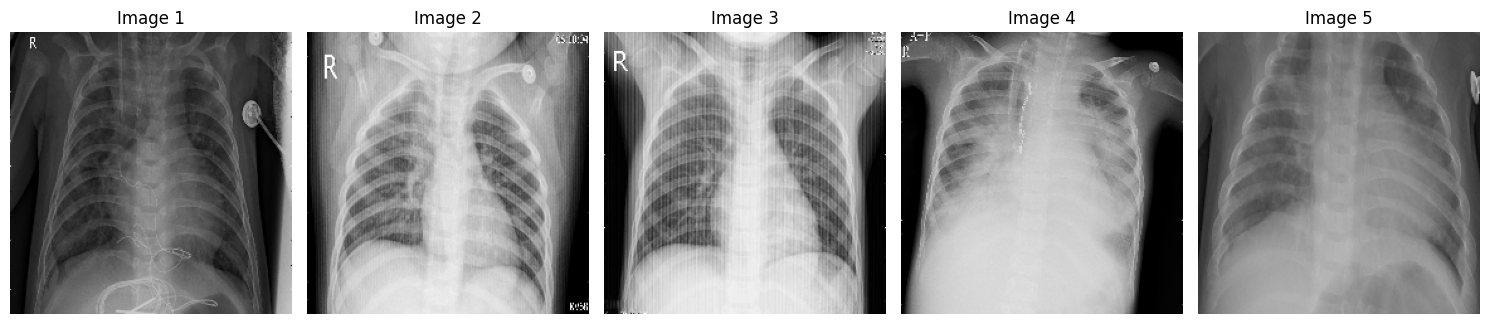

In [ ]:

# Display some processed images from the combined DataFrame
import matplotlib.pyplot as plt

def plot_processed_images(df, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        if i < len(df) and df['processed_image'][i] is not None:
            axes[i].imshow(df['processed_image'][i])
            axes[i].axis('off')
            axes[i].set_title(f"Image {i+1}")
        else:
            axes[i].axis('off') # Hide unused subplots
            axes[i].set_title(f"Image {i+1} (Not Available)")

    plt.tight_layout()
    plt.show()


plot_processed_images(combined_df)


label
PNEUMONIA        4265
NORMAL           1575
TURBERCULOSIS     691
COVID19           566
Name: count, dtype: int64


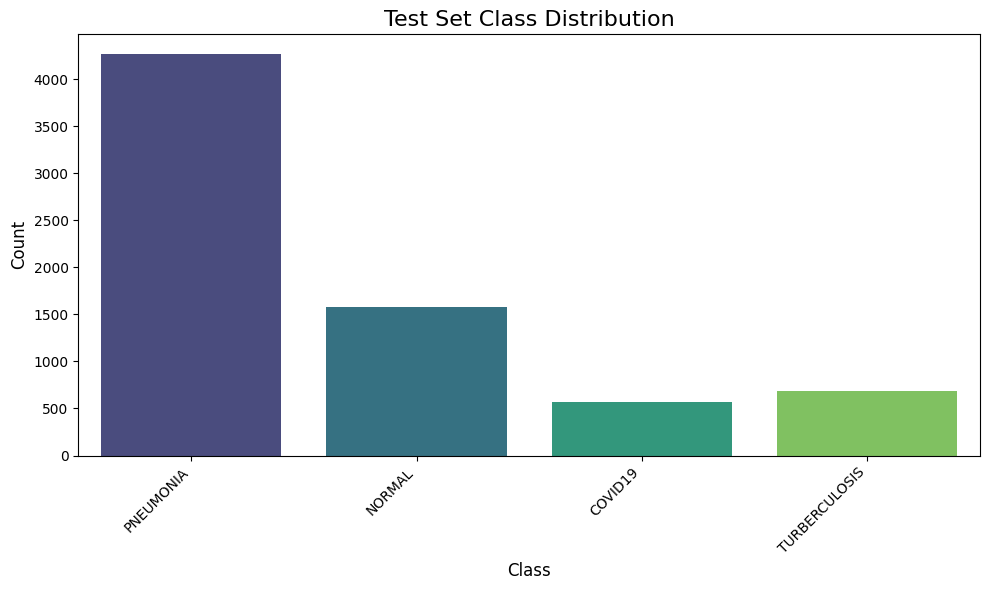

In [ ]:
# call functions for EDA
plot_class_distribution(combined_df, "# Set Class Distribution")


# Shuffling the training data

Shuffling the training data is an important step before training the model.

The command xtrain, ytrain = shuffle(xtrain, ytrain) randomly reorders the features (xtrain) and their corresponding labels (ytrain) while maintaining the correct alignment between them.

This ensures that the model does not learn any unintended patterns from the order of the data, leading to better generalization and preventing overfitting. Shuffling is typically done before each training epoch.

In [ ]:
#split combined DataFrame to train ,test

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

#split combined DataFrame to train ,test
X_train = np.array(combined_df['processed_image'].tolist())
y_train = combined_df['label']


X_train, y_train = shuffle(X_train,y_train, random_state=101)

X_train = np.array(X_train)


X_train.shape

(7097, 224, 224, 3)

# Dividing the dataset as a Train & Test


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

#  Performing one Hot Encoding on the labels after convering them to numbers

In [ ]:
#  Performing one Hot Encoding on the labels after convering them to numbers
import tensorflow as tf
labels = ['COVID19','NORMAL','PNEUMONIA','TURBERCULOSIS']
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Dropout,Dense
from tensorflow.keras.models import Model
efficientNet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(224,224,3))

At first, I tried addressing the class imbalance using data augmentation and class weights,

 but the accuracy was quite low. Unfortunately, I did not document the model at that stage.

  Later, I removed the data augmentation and applied only class weights, which led to a significant improvement in accuracy

In [ ]:
model = efficientNet.output
model = GlobalAveragePooling2D()(model)
model = Dropout(rate=0.5)(model)
model = Dense(4,activation='softmax')(model)
model = Model(inputs=efficientNet.input, outputs = model)
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_2 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_1           │ (None, 224, 224, 3)    │              7 │ rescaling_2[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_3 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ normalization_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 225, 225, 3)    │              0 │ rescaling_3[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 112, 112, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 112, 112, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 112, 112, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 4,054,695 (15.47 MB)

 Trainable params: 4,012,672 (15.31 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [ ]:
# Calculate class weights
from sklearn.utils import class_weight
# Convert one-hot encoded labels to class indices
y_train_indices = np.argmax(y_train, axis=1)  # Get class indices from one-hot encoding
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_indices),  # Use class indices
    y=y_train_indices                  # Use class indices
)

class_weights_dict = dict(enumerate(class_weights))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer = 'Adam',
              metrics= ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("CovidModelEfficientNet.keras",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',
                              factor = 0.3,
                              patience = 2,
                              min_delta = 0.001,
                              mode='auto',verbose=1)


In [ ]:
hist = model.fit(X_train,
                 y_train,
                 validation_split=0.1,
                 epochs =15,
                 verbose=1,
                 batch_size=32,
                 class_weight=class_weights_dict,
                  callbacks=[tensorboard,checkpoint,reduce_lr]
                 )

Epoch 1/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step - accuracy: 0.8458 - loss: 0.3878
Epoch 1: val_accuracy improved from -inf to 0.82160, saving model to CovidModelEfficientNet.keras
180/180 ━━━━━━━━━━━━━━━━━━━━ 153s 432ms/step - accuracy: 0.8461 - loss: 0.3870 - val_accuracy: 0.8216 - val_loss: 0.4872 - learning_rate: 0.0010
Epoch 2/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.9517 - loss: 0.1163
Epoch 2: val_accuracy improved from 0.82160 to 0.93427, saving model to CovidModelEfficientNet.keras
180/180 ━━━━━━━━━━━━━━━━━━━━ 26s 145ms/step - accuracy: 0.9517 - loss: 0.1164 - val_accuracy: 0.9343 - val_loss: 0.1945 - learning_rate: 0.0010
Epoch 3/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.9674 - loss: 0.0772
Epoch 3: val_accuracy improved from 0.93427 to 0.96714, saving model to CovidModelEfficientNet.keras
180/180 ━━━━━━━━━━━━━━━━━━━━ 27s 152ms/step - accuracy: 0.9674 - loss: 0.0772 - val_accuracy: 0.9671 - val_loss: 0.1255 - learning_rate: 0.0010
Epo

**# Accuracy of the Model **

In [ ]:
results = model.evaluate(X_train,y_train)

200/200 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 0.9999 - loss: 7.5094e-04


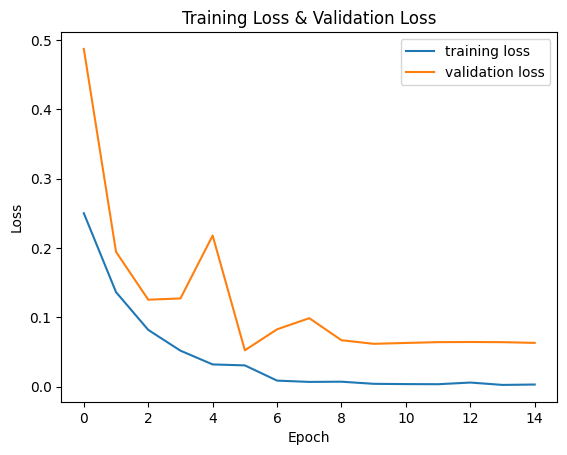

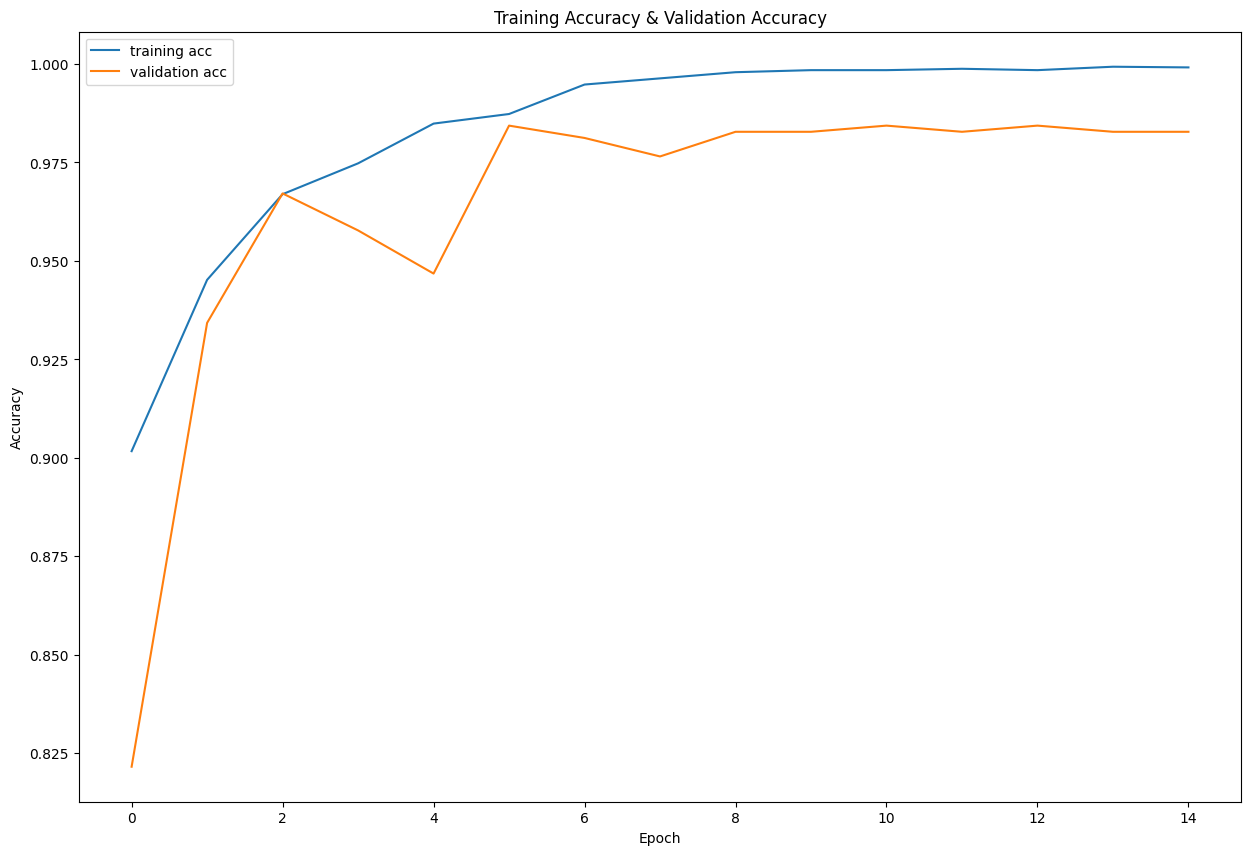

In [ ]:
plt.plot(hist.history["loss"],label = "training loss")
plt.plot(hist.history["val_loss"],label = "validation loss")
plt.title("Training Loss & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(15,10))
plt.plot(hist.history["accuracy"],label = "training acc")
plt.plot(hist.history["val_accuracy"],label = "validation acc")
plt.title("Training Accuracy & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# CLASSIFICATION REPORT¶


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
print(classification_report(y_test_new,pred))

23/23 ━━━━━━━━━━━━━━━━━━━━ 13s 357ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       0.94      0.98      0.96       135
           2       0.99      0.98      0.99       448
           3       1.00      1.00      1.00        64

    accuracy                           0.98       710
   macro avg       0.98      0.99      0.99       710
weighted avg       0.98      0.98      0.98       710



[[ 63   0   0   0]
 [  0 132   3   0]
 [  0   8 440   0]
 [  0   0   0  64]]


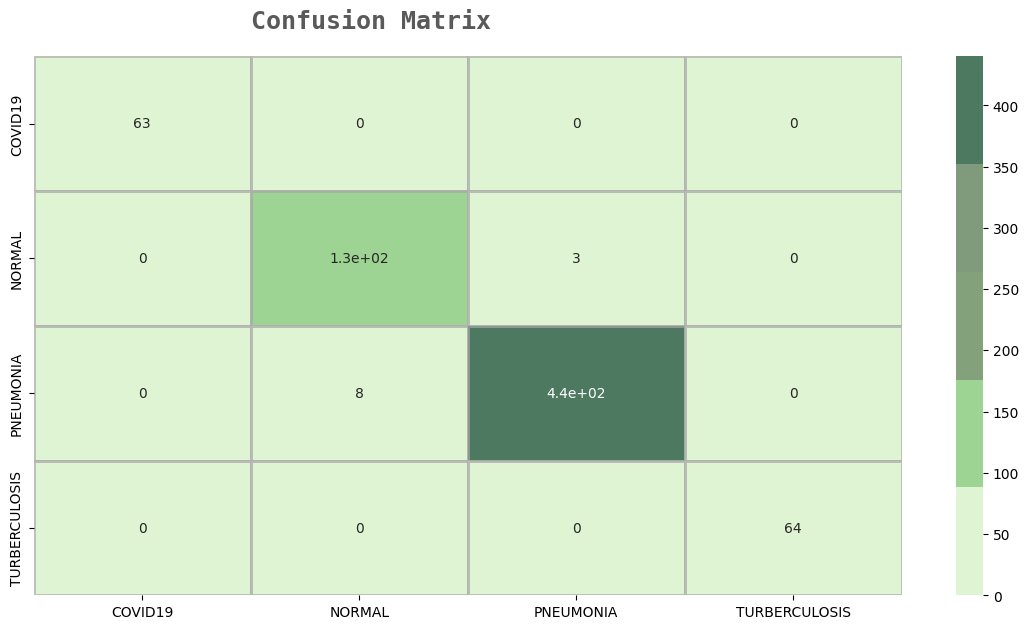

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.heatmap(confusion_matrix(y_test_new,pred),
            ax=ax,
            xticklabels=labels,
            yticklabels=labels,
            annot=True,
            cmap=colors_green[::-1],
            alpha=0.7,
            linewidths=2,
            linecolor=colors_dark[3]
            )

fig.text(s='Confusion Matrix',
         size=18,
         fontweight='bold',
         fontname='monospace',
         color=colors_dark[1],
         y=0.92,
         x=0.28,
         alpha=0.8)
print(confusion_matrix(y_test_new,pred))
plt.show()

**This is awesome result ,so I will save this model**

In [ ]:
model.save('chest_efficientb0_h5.h5')
#model.save('chest_efficientb0_keras.keras')

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def predict_and_generate_medical_report(model, image_path):
    """
    Predict chest X-ray class and generate a formal medical-style report.

    Parameters:
    - model: Trained Keras model
    - image_path: Full path to the image
    - class_names: List of class labels
    - patient_id: Optional patient ID

    Returns:
    - None (shows image and prints a medical-style report)
    """
    class_names = ['COVID19','NORMAL','PNEUMONIA','TURBERCULOSIS']

    # Load and preprocess image
    img = cv2.imread(image_path)
    if img is None:
        print("Error: couldn't read image:", image_path)
        return

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (224, 224))
    #img_normalized = img_resized.astype('float32') / 255.0
    img_input = np.expand_dims(img_resized, axis=0)

    # Model prediction
    prediction = model.predict(img_input)
    predicted_index = np.argmax(prediction)
    confidence = prediction[0][predicted_index] * 100
    predicted_label = class_names[predicted_index]

    # Extract actual label from directory
    actual_label = os.path.basename(os.path.dirname(image_path))

    # Display the image
    plt.figure(figsize=(6, 6))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f"Actual: {actual_label} | Predicted: {predicted_label}", fontsize=11, color='darkgreen')
    plt.show()

    # Generate the medical report
    print("=" * 50)
    print("              Chest X-Ray Radiology Report")
    print("=" * 50)
   # print(f"Patient ID        : {patient_id}")
    print(f"Image Path        : {image_path}")
    print(f"Actual Diagnosis  : {actual_label}")
    print(f"AI Prediction     : {predicted_label}")
    print(f"Confidence Score  : {confidence:.2f}%")
    print("-" * 50)
    print("Radiologist Note:")
    if predicted_label == "NORMAL":
        print("  - The lungs appear clear with no visible abnormalities.")
    elif predicted_label == "COVID19":
        print("  - Bilateral ground-glass opacities observed, consistent with COVID-19 findings.")
    elif predicted_label == "PNEUMONIA":
        print("  - Infiltrates and consolidation suggest possible pneumonia.")
    elif predicted_label == "TURBERCULOSIS":
        print("  - Cavitary lesions and upper lobe infiltrates noted. Radiographic findings raise suspicion of pulmonary tuberculosis.")
    else:
        print("  - Unclear findings. Further clinical evaluation and additional imaging may be required.")

    print()
    if predicted_label != actual_label:
        print("*Note:* The AI model's prediction differs from the provided label. Manual review recommended.")
    print("=" * 50)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


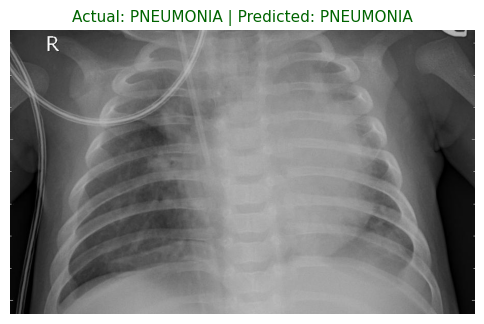

              Chest X-Ray Radiology Report
Image Path        : /kaggle/input/chest-xray-pneumoniacovid19tuberculosis/test/PNEUMONIA/person100_bacteria_479.jpeg
Actual Diagnosis  : PNEUMONIA
AI Prediction     : PNEUMONIA
Confidence Score  : 100.00%
--------------------------------------------------
Radiologist Note:
  - Infiltrates and consolidation suggest possible pneumonia.



In [ ]:
image_path ="/kaggle/input/chest-xray-pneumoniacovid19tuberculosis/test/PNEUMONIA/person100_bacteria_479.jpeg"
predict_and_generate_medical_report(model, image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


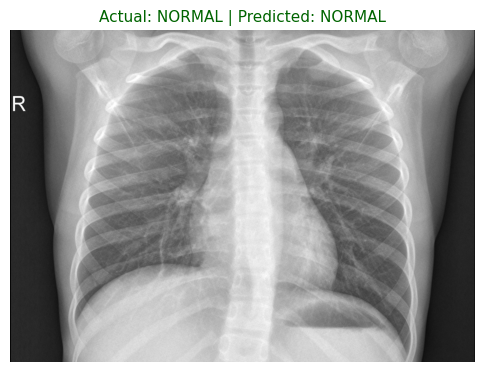

              Chest X-Ray Radiology Report
Image Path        : /kaggle/input/chest-xray-pneumoniacovid19tuberculosis/test/NORMAL/IM-0003-0001.jpeg
Actual Diagnosis  : NORMAL
AI Prediction     : NORMAL
Confidence Score  : 100.00%
--------------------------------------------------
Radiologist Note:
  - The lungs appear clear with no visible abnormalities.



In [ ]:
image_path ="/kaggle/input/chest-xray-pneumoniacovid19tuberculosis/test/NORMAL/IM-0003-0001.jpeg"
predict_and_generate_medical_report(model, image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


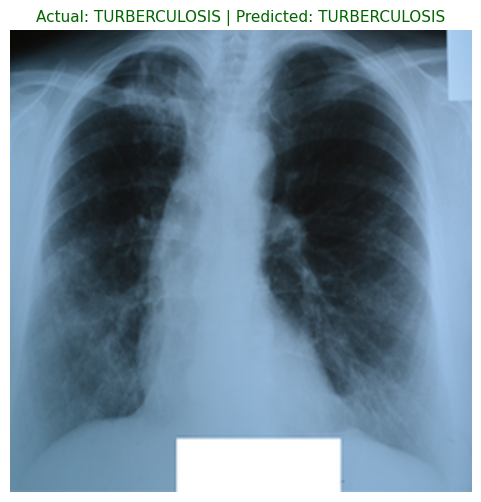

              Chest X-Ray Radiology Report
Image Path        : /kaggle/input/chest-xray-pneumoniacovid19tuberculosis/val/TURBERCULOSIS/Tuberculosis-1.png
Actual Diagnosis  : TURBERCULOSIS
AI Prediction     : TURBERCULOSIS
Confidence Score  : 100.00%
--------------------------------------------------
Radiologist Note:
  - Cavitary lesions and upper lobe infiltrates noted. Radiographic findings raise suspicion of pulmonary tuberculosis.



In [ ]:
image_path ="/kaggle/input/chest-xray-pneumoniacovid19tuberculosis/val/TURBERCULOSIS/Tuberculosis-1.png"
predict_and_generate_medical_report(model, image_path)